# State Reducers

## Default reducer

In [21]:
# Import libraries
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image
from typing_extensions import TypedDict

In [22]:
# Define state
class DefaultState(TypedDict):
    val: int

In [23]:
# Define node
def def_node(state: DefaultState) -> DefaultState:
    return {"val": state["val"] + 1}

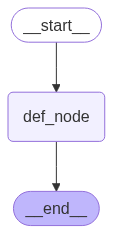

In [24]:
# Define graph
graphBuilder = StateGraph(DefaultState)
graphBuilder.add_node("def_node", def_node)

graphBuilder.add_edge(START, "def_node")
graphBuilder.add_edge("def_node", END)

graph = graphBuilder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
# Test the graph
graph.invoke({"val": 1})

{'val': 2}

## Simple reducer implementation
### Defualt reducer: Overwrite
### Simple implementation to add to a list using add from operator

In [ ]:
# Import libraries
from typing import Annotated
from operator import add

In [4]:
# Define state
class State(TypedDict):
    data: Annotated[list[int], add]

In [18]:
# Define node
def node_1(state: State) -> State:
    return {"data": [state["data"][-1] + 1]}

def node_2(state: State) -> State:
    return {"data": [state["data"][-1] + 1]}

def node_3(state: State) -> State:
    return {"data": [state["data"][-1] + 1]}

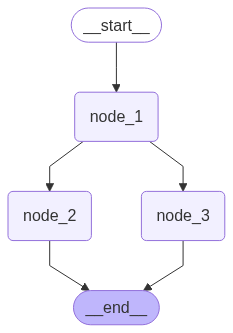

In [19]:
# Define graph with branching
graphBuilder = StateGraph(State)
graphBuilder.add_node("node_1", node_1)
graphBuilder.add_node("node_2", node_2)
graphBuilder.add_node("node_3", node_3)

graphBuilder.add_edge(START, "node_1")
graphBuilder.add_edge("node_1", "node_2")
graphBuilder.add_edge("node_1", "node_3")
graphBuilder.add_edge("node_2", END)
graphBuilder.add_edge("node_3", END)

graph = graphBuilder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))


In [20]:
graph.invoke({"data": [1]})

{'data': [1, 2, 3, 3]}

## Custom Reducers
### Define and use a reducer for list concatenation but considers None type

In [26]:
# Define reducer and build state from it
def safe_add(left: list[int] | None, right: list[int] | None) -> list[int]:
    if left is None:
        left = []
    if right is None:
        right = []
    return left + right

class CustomState(TypedDict):
    data: Annotated[list[int], safe_add]

In [27]:
# Define a node that always returns [2]
def node_1(state: CustomState) -> CustomState:
    return {"data": [2]}

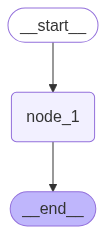

In [28]:
# Define graph
graphBuilder = StateGraph(CustomState)
graphBuilder.add_node("node_1", node_1)

graphBuilder.add_edge(START, "node_1")
graphBuilder.add_edge("node_1", END)

graph = graphBuilder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
# Test the graph
graph.invoke({"data": None})

{'data': [2]}

## Add Messages Reducer for Messages

In [32]:
# Import libraries
from langchain_core.messages import AIMessage, HumanMessage, AnyMessage, RemoveMessage
from langgraph.graph.message import add_messages

### Add to a list of messages using add_messages reducer

In [34]:
messages = [HumanMessage(content="Hello!", name="Arnab"), AIMessage(content="Hi there!", name="model")]

new_message = HumanMessage(content="How are you?", name="Arnab")

add_messages(messages, new_message)

[HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}, name='Arnab', id='975da296-15fc-4fc8-9be4-c8d2c6bbc156'),
 AIMessage(content='Hi there!', additional_kwargs={}, response_metadata={}, name='model', id='ed2c3ba4-21d4-4e74-aec0-f9498434b7cb'),
 HumanMessage(content='How are you?', additional_kwargs={}, response_metadata={}, name='Arnab', id='bc1fdb05-7f68-47c1-9302-77aad871b3a5')]

### Overwrite messages

In [35]:
messages = [HumanMessage(content="Hello!", name="Arnab", id=1), AIMessage(content="Hi there!", name="model", id=2)]

new_message = HumanMessage(content="Howdy!", name="Arnab", id=1)

add_messages(messages, new_message)

[HumanMessage(content='Howdy!', additional_kwargs={}, response_metadata={}, name='Arnab', id='1'),
 AIMessage(content='Hi there!', additional_kwargs={}, response_metadata={}, name='model', id='2')]

### Remove messages

In [39]:
# Define wole list of messages
messages = [HumanMessage(content="Hello!", name="Arnab", id=1), 
            AIMessage(content="Hi there!", name="model", id=2), 
            HumanMessage(content="How are you?", name="Arnab", id=3), 
            AIMessage(content="I am doing great!", name="model", id=4)]

# Identify messages to remove
messages_to_remove = [RemoveMessage(id=m.id) for m in messages[:-2]]
print(messages_to_remove)

# Remove messages
add_messages(messages, messages_to_remove)

[RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='1'), RemoveMessage(content='', additional_kwargs={}, response_metadata={}, id='2')]


[HumanMessage(content='How are you?', additional_kwargs={}, response_metadata={}, name='Arnab', id='3'),
 AIMessage(content='I am doing great!', additional_kwargs={}, response_metadata={}, name='model', id='4')]